### Imports

In [1042]:
import random
import os
import re
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps
import matplotlib.pyplot as plt
import numpy as np

import time
import warnings
warnings.filterwarnings("ignore")

### Prepara listas de fontes e de palavras

In [1043]:
# Lista fontes do windows (alterar pasta se necessário):
fontesPath = "C:\Windows\Fonts"
todasFontes = os.listdir(fontesPath)
# Filtra fontes 'interessantes':
fontesInteressantes = ['broadsheet']
fontes = []
for f in todasFontes:
    if any([s.lower() in f.lower() for s in fontesInteressantes]):
        fontes.append(f)
        
# Gera lista de palavras a partir de um livro
def limpa_string(s,l):
    out = ""
    for c in s:
        if c not in l:
            out += c
    return out

palavras = []
caracteresIndesejados = '"@#$%&*-_!/?\|!:;)(1234567890.><][}{+=,'
with open('jules_verne.txt','r') as f:
    for line in f:
        for word in line.split():
            palavras.append(limpa_string(word,caracteresIndesejados))
# Tira palvras de uma só letra:
palavras = [x for x in palavras if len(x)>1]
# Tira palavras com mais de 18 letras:
palavras = [x for x in palavras if len(x)<=18]
# Tira palavras duplicadas:
palavras = np.unique(palavras)
# Formata palavras: primeira letra maiúscula, resto minúsculas:
palavras = [x.lower()[1].upper() + x.lower()[2:] if x.lower()[0] in ('"',"'") else x.lower()[0].upper() + x.lower()[1:] for x in palavras]

### Gera uma imagem em branco

In [711]:
imgWidth = 22*16
imgHeight = 17*16
im = Image.new('RGB',(imgWidth, imgHeight),'white')
dsnh = ImageDraw.Draw(im)

### Insere lista de palavras aleatórias na imagem

In [712]:
lins = 17 #número de linhas a gerar
pals = 1 #número de palavras por linha
numSize = 5 #número de caracteres no número a gerar
whiteSpace = 7 #número de "espaços" entre colunas
greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
#fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
fontSize = 12
fontChoice = random.choice(fontes) #escolhe uma fonte aleatória

In [713]:
def calcula_pontinhos(p):
    ini = 17
    plus = 24
    if len(p)<=3:
        return ['...   ...   ...   ...   ',ini]
    elif len(p)<=8:
        return ['...   ...   ...   ',ini+plus]
    elif len(p)<=12:
        return ['...   ...   ',ini+2*plus]
    elif len(p)<=18:
        return ['...   ',ini+3*plus]
    else:
        return ['',0]

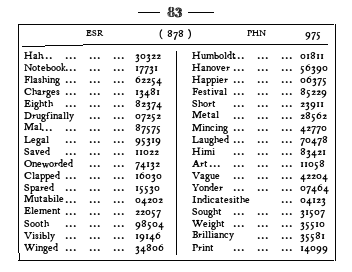

In [714]:
font = ImageFont.truetype(fontChoice, fontSize)
fontSmall = ImageFont.truetype(fontChoice, fontSize-2)
fontBig = ImageFont.truetype('School Book New.ttf', fontSize+2)
colPalavras = []
colNumeros = []
for l in range(2*lins):
    colPalavras.append(random.choice(palavras))
    colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

pontinhos = [calcula_pontinhos(x) for x in colPalavras]
posX = 24
posY = 48


# Palavras, pontinhos e números:
for l in range(lins):
    ## Primeira Coluna ##
    # Imprime uma palavra:
    dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
    # Imprime pontinhos:
    dsnh.text((posX+pontinhos[l][1],(posY+l*fontSize)),pontinhos[l][0],(greyness,greyness,greyness),font=font)
    # Imprime Números:
    dsnh.text(((posX+9*fontSize+2)+1,(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font) 
    
    ## Segunda Coluna ##
    # Imprime uma palavra:
    dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
    # Imprime pontinhos:
    dsnh.text((posX+pontinhos[l+lins][1]+2*whiteSpace*fontSize,(posY+l*fontSize)),pontinhos[l+lins][0],(greyness,greyness,greyness),font=font)
    # Imprime Números:
    dsnh.text(((posX+3*whiteSpace*fontSize)+24,(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)

im = cabecalho(im,greyness,posX,posY)
im = lin_horizon(im,greyness,posX,posY)
im = lin_vertical(im,greyness,posX,posY)
im

#### Inverte cores da imagem:

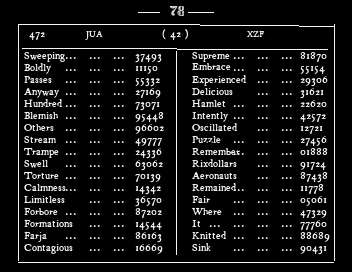

In [681]:
ImageOps.invert(im)

***
# Início do processo produtivo
***

In [1044]:
# Efeito de rasgo na página:
def rasgar(img,contraste):
    imagem = img.copy()
    lenRasgo = random.randint(100,imagem.size[0]//2)
    xInit = random.randint(0,imagem.size[0]-lenRasgo)
    yInit = random.randint(0,imagem.size[1])
    pixels = imagem.load()
    sinal=random.choice([-1,1])
    inclinacao = random.uniform(0.2,0.8)
    for p in range(xInit,xInit+lenRasgo):
        y = yInit
        tStrip = random.choice([0,1,2])   
        if random.random() <= inclinacao:
            y=y+sinal*tStrip
        else:
            y=y-sinal*tStrip
        for i in range(0-(tStrip//2),3+(tStrip//2)):
            greyness = random.randint(0,80)
            if (y+i)<10:
                y+=tStrip
            elif (y+i)>(imagem.size[1]-10):
                y-=tStrip
            #print("x: %d | y: %d"%(p,y+i))
            pixels[p,y+i] = (contraste,contraste,contraste)
        yInit = y
    return imagem

def cabecalho(img,contraste,posX,posY):
    imagem = img.copy()
    d = ImageDraw.Draw(imagem)
    bigN = str(random.randint(1, 99))
    smallN = "( " + str(random.randint(1, 999)) + " )"
    pgN = str(random.randint(1, 999))
    d.text((((imgWidth-d.textsize(bigN,font=fontBig)[0])/2),5),bigN,(greyness,greyness,greyness),font=fontBig)
    d.text((((imgWidth-d.textsize(smallN,font=font)[0])/2),posY-22),smallN,(greyness,greyness,greyness),font=font)
    d.text((posX+5+random.randint(0,1)*23*fontSize,posY-22),pgN,(greyness,greyness,greyness),font=font)
    chamadas=random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + \
    random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + \
    random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + \
    ' '*4*fontSize + random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + \
    random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + \
    random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    d.text((((imgWidth-d.textsize(chamadas,font=fontSmall)[0])/2),posY-20),chamadas,(greyness,greyness,greyness),font=fontSmall)
    return imagem

# Gera pontinhos entre palavras e números:
def calcula_pontinhos(p):
    ini = 17
    plus = 24
    if len(p)<=3:
        return ['...   ...   ...   ...   ',ini]
    elif len(p)<=8:
        return ['...   ...   ...   ',ini+plus]
    elif len(p)<=12:
        return ['...   ...   ',ini+2*plus]
    elif len(p)<=18:
        return ['...   ',ini+3*plus]
    else:
        return ['',0]

# Linhas verticais:
def lin_vertical(img,contraste,posX,posY):
    imagem = img.copy()
    pixels = imagem.load()
    sinal=random.choice([-1,1])
    thickness = 1
    lengthLine = 150
    
    ### Linhas maiores (esquerda e direita): ###
    for p in range(posY-24,posY+imgHeight-59):
        if random.random() <= 0.0002:
            posX += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[posX-6+l,p] = (contraste,contraste,contraste)
    #---#
    for p in range(posY-24,posY+imgHeight-59):
        if random.random() <= 0.0002:
            posX += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[posX+310+l,p] = (contraste,contraste,contraste)
    ### Linha central - separa colunas ###
    for p in range(posY+3,posY+imgHeight-65):
        if random.random() <= 0.0002:
            posX += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[(imgWidth/2)+l,p] = (contraste,contraste,contraste)
    return imagem

# Linhas horizontais:
def lin_horizon(img,contraste,posX,posY):
    imagem = img.copy()
    pixels = imagem.load()
    sinal=random.choice([-1,1])
    thickness = 1
    ### Linhas maiores (topo e fundo): ###
    lengthLine = 310
    for p in range(posX-6,posX+lengthLine):
        if random.random() <= 0.002:
            posY += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[p,posY-24+l] = (contraste,contraste,contraste)
    #---#
    for p in range(posX-6,posX+lengthLine):
        if random.random() <= 0.002:
            posY += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[p,posY+imgHeight-60+l] = (contraste,contraste,contraste)
    ### Linha interna - separa cabeçalho ###
    for p in range(posX-2,posX+lengthLine-6):
        if random.random() <= 0.002:
            posY += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[p,posY-2+l] = (contraste,contraste,contraste)
    ### Linhas ao lado do número superior: ###    
    for p in range(posX+114,posX+136):
        if random.random() <= 0.002:
            posY += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[p,12+l] = (contraste,contraste,contraste)
    for p in range(posX+164,posX+190):
        if random.random() <= 0.002:
            posY += sinal
        for l in range(0-(thickness//2),1+(thickness//2)):
            pixels[p,12+l] = (contraste,contraste,contraste)
    return imagem

# Pontilhados:
def pontilhados(img,contraste):
    imagem = img.copy()
    dsnh = ImageDraw.Draw(imagem)
    try:
        fontSize = random.randint(12,24)
        fontChoice = random.choice(fontes)
        font = ImageFont.truetype(fontChoice, fontSize)
    except:
        fontSize = random.randint(12,24)
        fontChoice = random.choice(fontes)
        font = ImageFont.truetype(fontChoice, fontSize)
    lins = random.randint(2,30)
    for l in range(1,lins):
        numPontos = random.randint(10,30)
        pt = int(imagem.size[0]-(numPontos+5)*fontSize)
        if pt < 0:
            pt = 0
        posX = random.randint(0,pt)
        dsnh.text((posX,random.randint(5,int(imagem.size[1]-15))),'.'*numPontos,(contraste,contraste,contraste),font=font)
    return imagem

# Sal e Pimenta
def salt_and_pepper(img):
    imagem = np.asarray(img)
    imagem.setflags(write=1)
    row,col,ch = imagem.shape
    s_vs_p = 0.5
    amount = 0.004
    # Salt mode
    num_salt = np.ceil(amount * imagem.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in imagem.shape]
    imagem[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* imagem.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in imagem.shape]
    imagem[coords] = 0
    return Image.fromarray(imagem[:,:,1],mode="L")

# Sombreados nas bordas e fundo mais escuro:
def shadows(img):
    imagem = img.copy()
    pixels = imagem.load()
    w,h = imagem.size
    
    #Pinta fundo:
    bkg = random.randint(210,220)
    for lin in range(h):
        for col in range(w):
            if pixels[col,lin][0]>200:
                pixels[col,lin]=(bkg,bkg,bkg)
    ### Escurece laterais: ###
    #Esquerda:
    lenShadow = random.randint(10,np.floor(w*0.15))
    for col in range(lenShadow):
        shd = bkg - (lenShadow-col)
        for lin in range(h):
            if pixels[col,lin][0]>=200:
                pixels[col,lin]=(shd,shd,shd)
    #Direita:
    lenShadow = random.randint(10,np.floor(w*0.15))
    for col in range(lenShadow):
        shd = bkg - (lenShadow-col)
        for lin in range(h):
            if pixels[w-(col+1),lin][0]>=200:
                pixels[w-(col+1),lin]=(shd,shd,shd)
    #Cima:
    lenShadow = random.randint(10,np.floor(h*0.10))
    for lin in range(lenShadow):
        for col in range(w):
            if pixels[col,lin][0]>=150:
                shd = pixels[col,lin][0] - (lenShadow-lin)
                pixels[col,lin]=(shd,shd,shd)
    #Baixo:
    lenShadow = random.randint(10,np.floor(h*0.10))
    for lin in range(lenShadow):
        for col in range(w):
            if pixels[col,h-(lin+1)][0]>=150:
                shd = pixels[col,h-(lin+1)][0] - (lenShadow-lin)
                pixels[col,h-(lin+1)]=(shd,shd,shd)
    return imagem

In [1045]:
def gera_limpa_e_poluida():
    imgWidth = 22*16
    imgHeight = 17*16
    im = Image.new('RGB',(imgWidth, imgHeight),'white')
    dsnh = ImageDraw.Draw(im)
    
    lins = 17 #número de linhas a gerar
    pals = 1 #número de palavras por linha
    numSize = 5 #número de caracteres no número a gerar
    whiteSpace = 7 #número de "espaços" entre colunas
    greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
    #fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
    fontSize = 12
    fontChoice = random.choice(fontes) #escolhe uma fonte aleatória
    
    font = ImageFont.truetype(fontChoice, fontSize)
    fontSmall = ImageFont.truetype(fontChoice, fontSize-2)
    fontBig = ImageFont.truetype('School Book New.ttf', fontSize+2)
    colPalavras = []
    colNumeros = []
    for l in range(2*lins):
        colPalavras.append(random.choice(palavras))
        colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

    pontinhos = [calcula_pontinhos(x) for x in colPalavras]
    posX = 24
    posY = 48

    # Palavras, pontinhos e números:
    for l in range(lins):
        ## Primeira Coluna ##
        # Imprime uma palavra:
        dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
        # Imprime Números:
        dsnh.text(((posX+9*fontSize+2)+1,(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font) 

        ## Segunda Coluna ##
        # Imprime uma palavra:
        dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
        # Imprime Números:
        dsnh.text(((posX+3*whiteSpace*fontSize)+24,(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)
    
    limpa = im.copy()
    
    for l in range(lins):
        # Imprime pontinhos:
        dsnh.text((posX+pontinhos[l][1],(posY+l*fontSize)),pontinhos[l][0],(greyness,greyness,greyness),font=font)
        dsnh.text((posX+pontinhos[l+lins][1]+2*whiteSpace*fontSize,(posY+l*fontSize)),pontinhos[l+lins][0],(greyness,greyness,greyness),font=font)
        
    im = cabecalho(im,greyness,posX,posY)
    im = lin_horizon(im,greyness,posX,posY)
    im = lin_vertical(im,greyness,posX,posY)
    im = shadows(im)
    
    suja = im.copy()
    
    return limpa,suja

In [1046]:
def gera_batch_imgs(arqAtual,qtdArquivos):
    for i in range(arqAtual,qtdArquivos):
        try:
            limpa, suja = gera_limpa_e_poluida()
            fileL = os.getcwd()+'\\imgs\\teste\\img_%05d_mask.jpg'%i
            fileS = os.getcwd()+'\\imgs\\teste\\img_%05d_8.jpg'%i
            if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
                print("Criando pasta imgs/teste")
                os.makedirs(os.getcwd()+'\\imgs\\teste')
            ImageOps.invert(limpa).save(fileL)
            suja.save(fileS)
            print('\rImagem %d/%d gerada com sucesso!            '%(i+1,qtdArquivos),end='',flush=True)
        except:
            print('\rerro encontrado, gerando nova imagem        ',end='',flush=True)
            limpa, suja = gera_limpa_e_poluida()
            fileL = os.getcwd()+'\\imgs\\teste\\img_%05d_mask.jpg'%i
            fileS = os.getcwd()+'\\imgs\\teste\\img_%05d_8.jpg'%i
            if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
                print("Criando pasta imgs/teste")
                os.makedirs(os.getcwd()+'\\imgs\\teste')
            ImageOps.invert(limpa).save(fileL)
            suja.save(fileS)

In [ ]:
qtdArquivos = 11000 #quantidade máxima de arquivos a serem gerados
arquivosGerados = [int(x.split('_')[1]) for x in os.listdir(os.path.join('imgs/teste')) if '_8' in x]
if arquivosGerados == []:
    arquivosGerados = [0]
while max(arquivosGerados) < qtdArquivos-1:
    try:
        gera_batch_imgs(max(arquivosGerados),qtdArquivos)
    except:
        print("Um erro inesperado aconteceu, desculpe por capotarmos o algoritmo! Vamos tentar de novo em 10 segundos...")
        time.sleep(10)
        pass

Imagem 1070/11000 gerada com sucesso!             